In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam

import datetime

In [3]:
# Train
size = 'demo'
type_ = 'train'

X_train_file_path = f'./files/numpy/X_{type_}_{size}.npy'
y_train_file_path = f'./files/numpy/y_{type_}_{size}.npy'

X_train = np.load(X_train_file_path)
y_train = np.load(y_train_file_path)

# Validation 
size = 'demo'
type_ = 'validation'

X_val_file_path = f'./files/numpy/X_{type_}_{size}.npy'
y_val_file_path = f'./files/numpy/y_{type_}_{size}.npy'

X_val = np.load(X_val_file_path)
y_val = np.load(y_val_file_path)


print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(19818, 900)
(19818, 900)
(19818,)
(19818,)


In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [46]:
# Use only the first 100 rows for testing
# X_train = X_train[:80]
# y_train = y_train[:80]
# X_val = X_val[:20]
# y_val = y_val[:20]

In [6]:
# model = Sequential([
#     tf.keras.Input(shape=(X_val.shape[1],)),
#     Dense(256, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the first Dense layer
#     Dense(128, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the second Dense layer
#     Dense(32, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the third Dense layer
#     Dense(1, activation='linear')
# ])

# # Define the optimizer with a specific learning rate
# learning_rate = 1e-4
# clipnorm=1.0
# optimizer = Adam(learning_rate=learning_rate,clipnorm =clipnorm)

# # Compile the model
# model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'accuracy']) 

# # Summary of the model
# model.summary()

In [17]:
# Define the model
model = Sequential([
    tf.keras.Input(shape=(X_val.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the first Dense layer
    Dense(128, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the second Dense layer
    Dense(32, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the third Dense layer
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae', 'mape'])


In [28]:
# Prepare TensorBoard callback
log_dir = "files/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16,
                    validation_data=(X_val, y_val),
                    
                    callbacks=[tensorboard_callback, TqdmCallback(verbose=1),early_stop],
                    verbose=2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
1239/1239 - 14s - loss: 127.7380 - mse: 127.7380 - mae: 8.6149 - mape: 61.0818 - val_loss: 99.9846 - val_mse: 99.9846 - val_mae: 7.5042 - val_mape: 53.9160 - 14s/epoch - 11ms/step
Epoch 2/20
1239/1239 - 10s - loss: 122.2580 - mse: 122.2580 - mae: 8.3771 - mape: 59.1651 - val_loss: 95.2342 - val_mse: 95.2342 - val_mae: 7.4288 - val_mape: 55.7557 - 10s/epoch - 8ms/step
Epoch 3/20
1239/1239 - 11s - loss: 119.2275 - mse: 119.2275 - mae: 8.2843 - mape: 58.4472 - val_loss: 95.9339 - val_mse: 95.9339 - val_mae: 7.2663 - val_mape: 50.0446 - 11s/epoch - 9ms/step
Epoch 4/20
1239/1239 - 10s - loss: 115.4415 - mse: 115.4415 - mae: 8.1364 - mape: 57.1746 - val_loss: 88.9469 - val_mse: 88.9469 - val_mae: 7.2278 - val_mape: 56.2024 - 10s/epoch - 8ms/step
Epoch 5/20
1239/1239 - 11s - loss: 110.8373 - mse: 110.8373 - mae: 7.9751 - mape: 56.5105 - val_loss: 87.5247 - val_mse: 87.5247 - val_mae: 6.9535 - val_mape: 49.0154 - 11s/epoch - 9ms/step
Epoch 6/20
1239/1239 - 10s - loss: 110.3793 - mse

In [31]:
pd.DataFrame(history.history)

,loss,mse,mae,mape,val_loss,val_mse,val_mae,val_mape
0,127.737991,127.737991,8.614920,61.081825,99.984619,99.984619,7.504187,53.916012
1,122.258011,122.258011,8.377100,59.165085,95.234207,95.234207,7.428750,55.755741
2,119.227493,119.227493,8.284329,58.447170,95.933899,95.933899,7.266292,50.044617
3,115.441544,115.441544,8.136435,57.174568,88.946877,88.946877,7.227775,56.202377
4,110.837296,110.837296,7.975129,56.510464,87.524651,87.524651,6.953547,49.015388
5,110.379288,110.379288,7.935028,55.848236,85.080498,85.080498,6.927595,50.991035
6,106.459091,106.459091,7.775571,55.055611,83.236198,83.236198,6.765462,47.265419
7,104.017967,104.017967,7.671172,53.888744,80.638748,80.638748,6.727762,49.094383
8,101.158569,101.158569,7.575584,53.668213,76.921349,76.921349,6.512094,46.363121
9,98.563576,98.563576,7.474319,52.595867,79.042831,79.042831,6.592568,45.645401


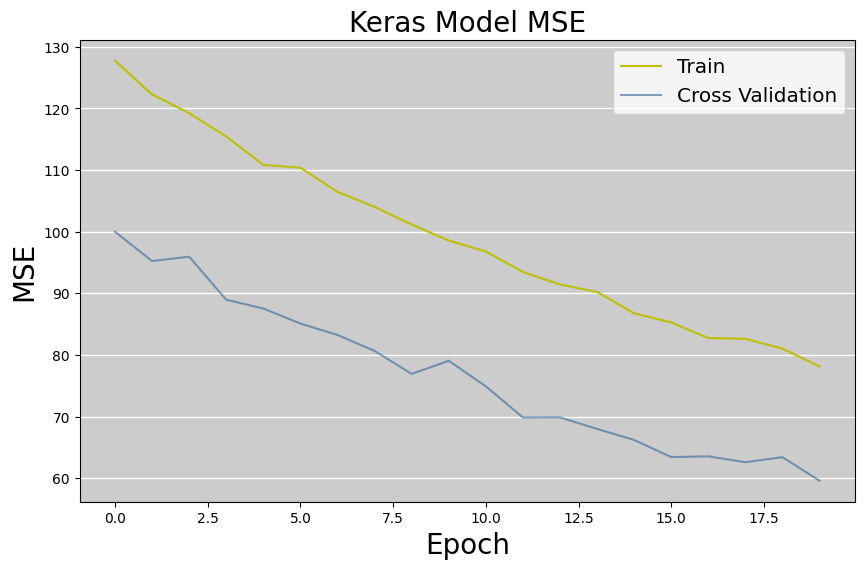

In [33]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mse'], color='y')
plt.plot(history.history['val_mse'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MSE',size=20)
plt.ylabel('MSE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

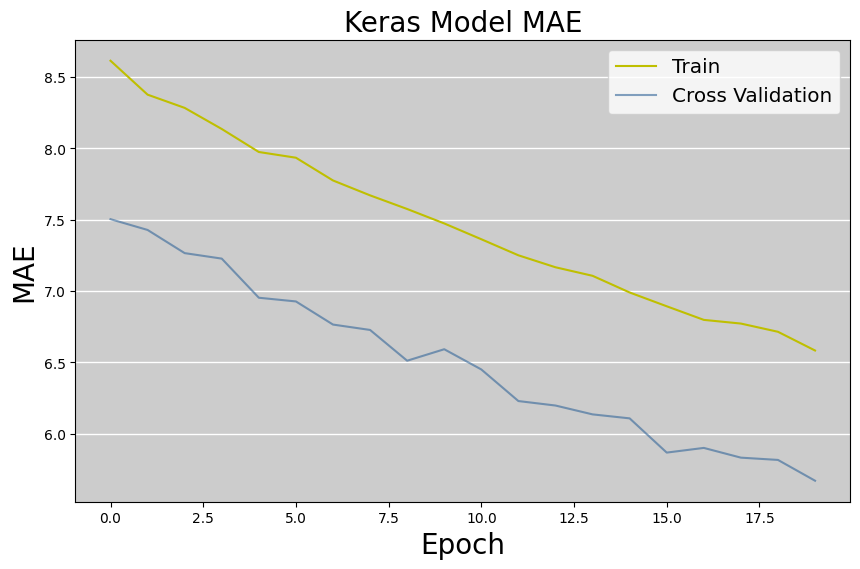

In [34]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], color='y')
plt.plot(history.history['val_mae'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MAE',size=20)
plt.ylabel('MAE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

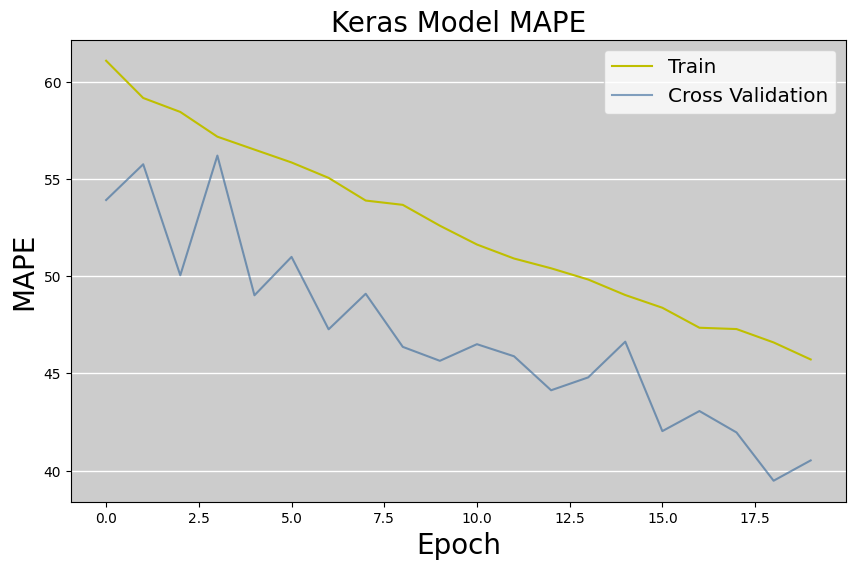

In [35]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mape'], color='y')
plt.plot(history.history['val_mape'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model MAPE',size=20)
plt.ylabel('MAPE',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

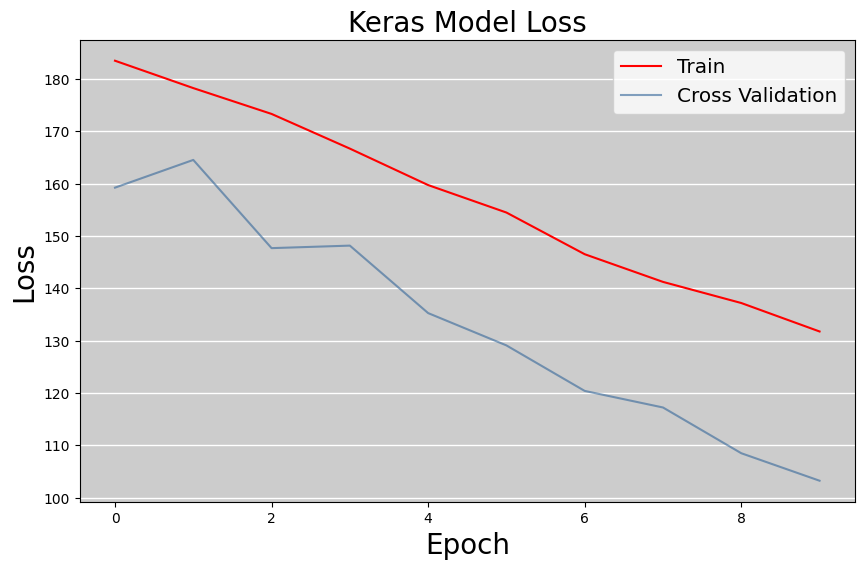

In [26]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Loss',size=20)
plt.ylabel('Loss',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

In [36]:
# Evaluate the model
train_loss, train_mse,train_mae,train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_mse,test_mae,test_acc = model.evaluate(X_val, y_val, verbose=1)

620/620 [==============================] - 2s 3ms/step - loss: 59.5797 - mse: 59.5797 - mae: 5.6709 - mape: 40.5220


In [37]:
# Save the 
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_file_path = f'./files/models/model_{now}.h5py'
model.save(model_file_path)

INFO:tensorflow:Assets written to: ./files/models/model_20240711-201645.h5py\assets


INFO:tensorflow:Assets written to: ./files/models/model_20240711-201645.h5py\assets
